# Dataset is Customer Churn Prediction:
* Churn refers to the rate at which customers stop doing business with a company over a given period.
* In customer churn prediction, the goal is to identify which customers are likely to leave (churn) in the future based on historical data.


In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import dataset from Kaggle-Drive.

In [59]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/datasets/customer_churn_dataset-testing-master.csv')

Displaying first 5 rows of the dataset.

In [60]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


Displaying shape, columns, and type of the data.

In [61]:
print(df.shape)
print(df.columns)
print(type(df))

(64374, 12)
Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>


# Data Preprocessing

Removing Unnecessary Columns:
1. CustomerID
2. Contract Length
3. Gender

In [62]:
df.drop(['CustomerID', 'Contract Length', 'Gender'], axis = 1, inplace = True)

Converting categorical features into numerical form.

In [63]:
df = pd.get_dummies(df, columns=["Subscription Type"], drop_first=True)
# one-hot encoding- converted string into numerical binary values(1 and 0).

In [64]:
df.dtypes

,0
Age,int64
Tenure,int64
Usage Frequency,int64
Support Calls,int64
Payment Delay,int64
Total Spend,int64
Last Interaction,int64
Churn,int64
Subscription Type_Premium,bool
Subscription Type_Standard,bool


In [65]:
df.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type_Premium,Subscription Type_Standard
0,22,25,14,4,27,598,9,1,False,False
1,41,28,28,7,13,584,20,0,False,True
2,47,27,10,2,29,757,21,0,True,False
3,35,9,12,5,17,232,18,0,True,False
4,53,58,24,9,2,533,18,0,False,True


Check if the dataset has duplicate values.

In [66]:
df.duplicated().sum()

np.int64(0)

Checking for null values

In [67]:
df.isna().sum()

,0
Age,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Total Spend,0
Last Interaction,0
Churn,0
Subscription Type_Premium,0
Subscription Type_Standard,0


Checking for unique values in each columns.

In [68]:
df.nunique()

,0
Age,48
Tenure,60
Usage Frequency,30
Support Calls,11
Payment Delay,31
Total Spend,901
Last Interaction,30
Churn,2
Subscription Type_Premium,2
Subscription Type_Standard,2


Checking if dataset is imbalanced.

In [69]:
print(df["Churn"].value_counts())

Churn
0    33881
1    30493
Name: count, dtype: int64


# Data Normalization using StandardScaler
* We didn't use MinMaxScaler because it is sensitive to outliers since it depends on min/max values.

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ["Age", "Tenure", "Usage Frequency", "Support Calls", "Payment Delay", "Total Spend", "Last Interaction"]
df[num_cols] = scaler.fit_transform(df[num_cols])

Get descriptive statistics for numerical columns.

In [71]:
df[num_cols].describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction
count,6.437400e+04,6.437400e+04,6.437400e+04,6.437400e+04,6.437400e+04,6.437400e+04,6.437400e+04
mean,-1.801357e-16,-9.183390e-17,5.651317e-17,-1.483471e-16,-1.554112e-16,-4.944902e-17,2.560753e-17
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-1.721459e+00,-1.812764e+00,-1.597050e+00,-1.734336e+00,-1.935571e+00,-1.690569e+00,-1.678425e+00
25%,-8.596877e-01,-8.185018e-01,-9.165002e-01,-7.709392e-01,-8.059011e-01,-8.740788e-01,-8.680864e-01
50%,2.083902e-03,5.878857e-02,-9.100567e-03,1.924579e-01,2.108019e-01,-2.692262e-02,-5.774822e-02
75%,8.638555e-01,8.775929e-01,8.982991e-01,8.347227e-01,8.886039e-01,8.700663e-01,8.683525e-01
max,1.653813e+00,1.637911e+00,1.692274e+00,1.476987e+00,1.453439e+00,1.759389e+00,1.678691e+00


# Data Visualization

 Visualize the correlation matrix for numerical features.


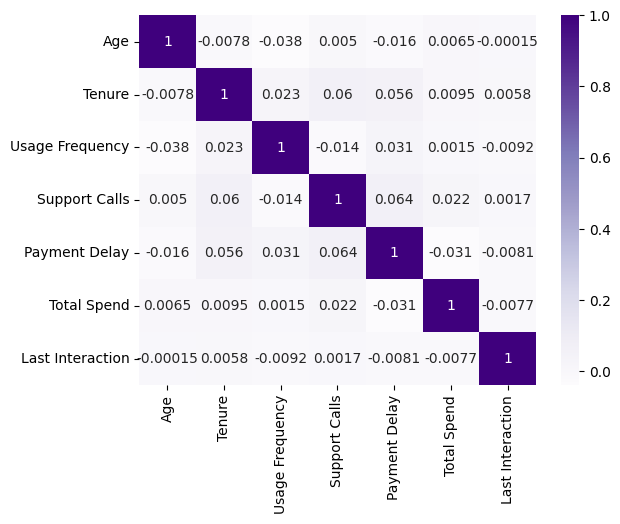

In [72]:
import seaborn as sb
import matplotlib.pyplot as plt
cm=df[num_cols].corr()
sb.heatmap(cm, annot=True, cmap='Purples') #annot=used to show number
plt.show()

Distribution of Churn and No-Churn using a pie chart.


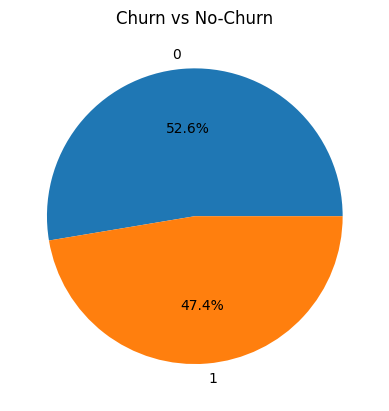

In [73]:
x = df['Churn'].value_counts()
plt.pie(x.values, labels=x.index, autopct='%1.1f%%')
plt.title('Churn vs No-Churn')
plt.show()

In [74]:
x = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type_Premium',
       'Subscription Type_Standard', 'Total Spend', 'Last Interaction']
y = 'Churn'

Splitting the dataset into train and test data.

In [75]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df[x], df[y], test_size=0.2, random_state=42)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(51499, 9)
(12875, 9)
(51499,)
(12875,)


Fitting the data into logistic regression model.

In [76]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

Evaluating the model's performance using accuracy score and confusion matrix.

In [77]:
from sklearn.metrics import accuracy_score
# Make predictions on the test set
ypred = model.predict(xtest)
acc_score = accuracy_score(ytest, ypred) * 100
print(f"Accuracy Score: {acc_score:.2f}")

Accuracy Score: 81.90


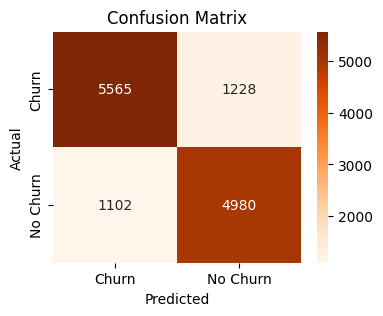

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3))
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=["Churn", "No Churn"], yticklabels=["Churn", "No Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Comparing train and test accuracy.

In [79]:
ypredtrain = model.predict(xtrain)
print('Train accuracy: ',accuracy_score(ypredtrain, ytrain) * 100)
print('Test accuracy: ',accuracy_score(ypred, ytest) * 100)

Train accuracy:  81.00157284607468
Test accuracy:  81.90291262135922


**Ensemble methods:**
* Bagging using RandomForestClassifier.
* Ensemble methods are used for improving predictive performance of models.

In [80]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
model = BaggingClassifier(estimator = RandomForestClassifier(), n_estimators = 5, random_state = 40)
model.fit(xtrain, ytrain)

BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=5,
                  random_state=40)

In [81]:
ypreds = model.predict(xtest)
rf_acc_score = accuracy_score(ytest, ypreds) * 100
print(rf_acc_score)

92.36504854368933


Comparing test accuracies between Logistic Regression and Random Forest.

In [82]:
# Print Accuracy Comparison
print("Accuracy Comparison:")
print(f"Logistic Regression: {acc_score:.4f}")
print(f"Random Forest (Ensemble): {rf_acc_score:.4f}")

Accuracy Comparison:
Logistic Regression: 81.9029
Random Forest (Ensemble): 92.3650
